In [1]:
from karateclub import Graph2Vec
from kuramoto import Kuramoto
from kuramoto.db_metrics import *
import networkx as nx
from sklearn.linear_model import LogisticRegression

In [2]:
nodes = 20
r = 50
num_samples = 100

df = gen_all(nodes, r, num_samples, edge_var="H", random_K=True, half_sync=False)
label = df['Concentrated']
df

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,s20_47,s20_48,s20_49,s20_50,# Edges,# Nodes,Min Degree,Max Degree,Diameter,Concentrated
0,0.060690,0.059783,0.050991,-0.055217,-0.052455,-0.027965,-0.016089,0.025919,-0.034912,-0.055706,...,4.114278,4.109991,4.105584,4.101065,31,20,2,5,5,1
1,0.000063,0.059629,-0.036254,0.030867,0.025255,-0.021645,0.000669,-0.056876,0.004696,-0.018066,...,0.217705,0.219436,0.221195,0.222981,158,20,12,19,2,1
2,-0.036314,-0.037958,-0.026481,-0.015024,-0.015326,0.036101,0.048056,-0.029889,-0.036627,0.003473,...,4.930906,4.910959,4.891496,4.872522,122,20,10,15,2,1
3,0.002398,-0.050436,0.061793,0.051253,-0.000274,0.036503,0.029419,0.053810,0.023326,-0.058299,...,2.064352,2.053818,2.043512,2.033431,93,20,6,14,3,1
4,0.037466,0.037074,-0.030810,0.026297,0.061897,0.006687,-0.045127,-0.054179,0.024370,0.021332,...,6.275659,0.021254,0.049954,0.078567,67,20,4,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.042053,-0.032251,-0.031816,-0.051368,-0.037142,-0.035844,-0.038619,0.018447,-0.002564,0.023799,...,0.419247,0.424061,0.428875,0.433690,56,20,4,7,4,1
90,-0.014170,0.028391,-0.024314,0.023383,0.010625,0.062668,-0.017489,-0.054357,-0.018196,-0.024496,...,0.084421,0.107013,0.129801,0.152794,125,20,10,14,2,1
91,0.050093,0.026606,0.035896,-0.043871,0.054197,0.008653,-0.027544,-0.047362,0.025711,0.055516,...,2.088778,2.098672,2.108878,2.119380,96,20,8,12,3,1
92,0.055794,-0.020618,-0.025992,0.038116,-0.022885,-0.033844,-0.021499,-0.047683,0.063702,-0.012739,...,5.403692,5.418426,5.433457,5.448784,50,20,4,7,4,1


In [35]:
df.columns = df.columns.astype(str)

In [37]:
df.to_parquet('datasets/kuramoto.parquet', index=None)

In [11]:
print(np.array(df['# Edges']).std())
print(sum(df['Concentrated']))

37.586327373558625
94


## Only Dynamics

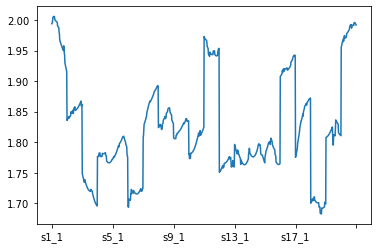

In [10]:
df1 = df.loc[:,'s1_1': f's{nodes}_{r}']
df1 = pd.concat([df1, label], axis=1)
df1.reset_index(drop=True).describe().loc['std'].plot();

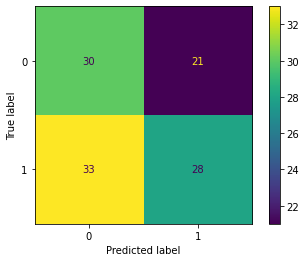

Precision: 0.571
Recall: 0.459
F1: 0.509
Accuracy: 0.518


In [27]:
X_train, X_test, y_train, y_test = generate_data(df1)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

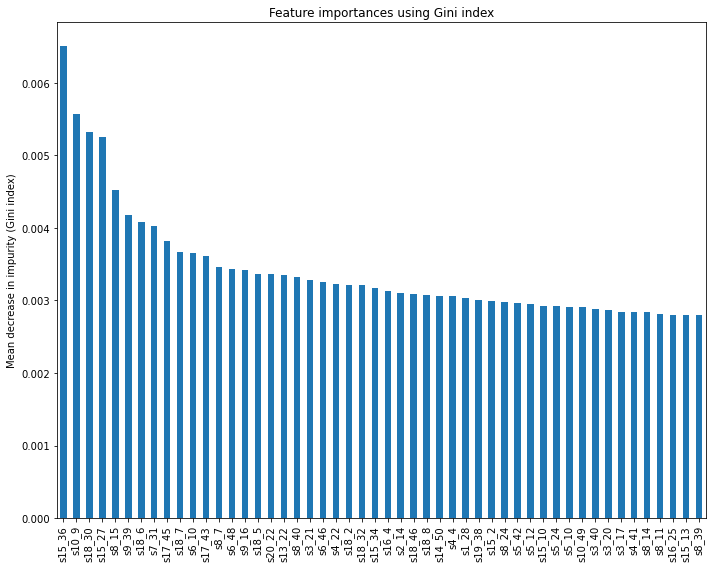

In [16]:
plot_gini_index(clf, X_train)

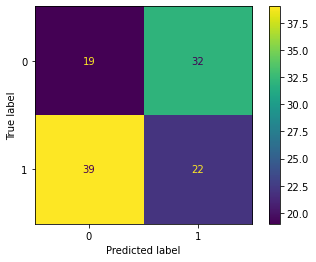

Precision: 0.407
Recall: 0.361
F1: 0.383
Accuracy: 0.366


In [17]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

## Only graphs with adjacency matrix

In [18]:
df2 = df.loc[:,0:nodes**2-1]
df2 = pd.concat([df2, label], axis=1)
df2.reset_index(drop=True)

,0,1,2,3,4,5,6,7,8,9,...,391,392,393,394,395,396,397,398,399,Concentrated
0,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
1,0,1,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,1,0,1
2,0,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
3,0,1,1,1,1,1,1,1,0,0,...,0,1,1,1,1,1,1,1,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94719,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
94720,0,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,0,1
94721,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,1
94722,0,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,1,0,1


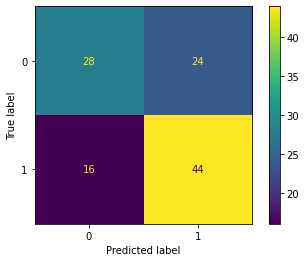

Precision: 0.647
Recall: 0.733
F1: 0.688
Accuracy: 0.643


In [19]:
X_train, X_test, y_train, y_test = generate_data(df2)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

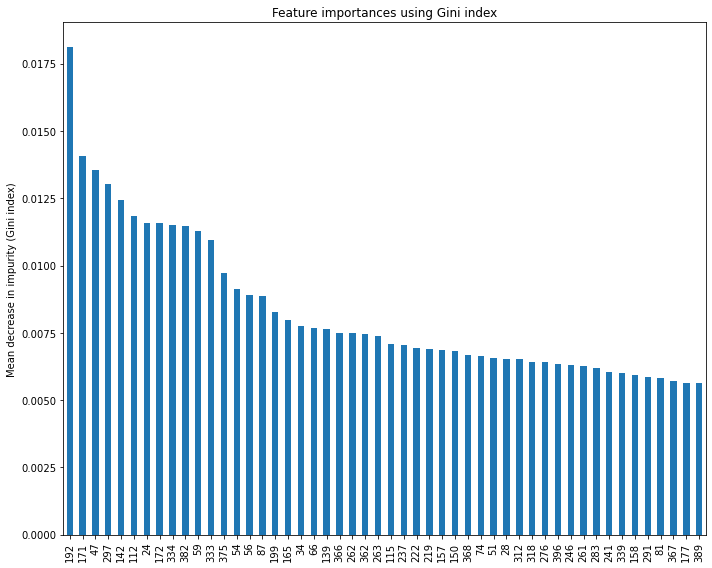

In [20]:
plot_gini_index(clf, X_train)

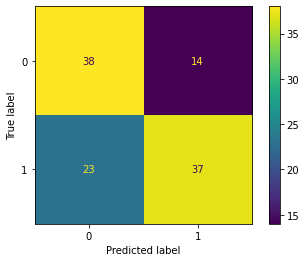

Precision: 0.725
Recall: 0.617
F1: 0.667
Accuracy: 0.670


In [21]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

## Only graphs with graph2vec

In [22]:
df3 = df.loc[:,'f1':'f16']
df3 = pd.concat([df3, label], axis=1)
df3.reset_index(drop=True)

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,Concentrated
0,-0.134224,-0.375516,0.081313,0.624261,-0.026964,-0.512860,0.033917,-0.748639,-0.377232,0.165236,0.345380,-0.399908,-0.612238,0.028213,-0.336020,-0.335045,1
1,-0.342451,-0.421112,0.152607,0.401604,-0.518923,-0.831711,-0.114687,-0.962839,0.274219,0.303514,0.090747,-0.558882,-1.074854,-0.037454,-0.787028,-0.101259,1
2,-0.525245,-0.654797,0.692669,-0.064720,-0.192167,-1.228563,0.105271,-1.506042,1.119897,0.201527,1.193448,-0.482095,-0.894476,0.888841,-1.253124,-0.209852,1
3,0.106324,-0.938859,0.000462,0.072414,-0.384244,0.217398,0.437083,-0.162225,0.037311,-0.417904,1.105491,-0.177290,-0.393038,0.424686,-0.290539,0.427298,1
4,-0.304361,-0.436455,-0.434965,0.592765,-0.073356,0.046453,0.335660,-0.070663,0.267074,0.313754,0.333518,-0.261332,-0.358794,0.182134,-0.170259,0.107966,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94719,-0.260291,0.045311,-0.167602,1.066576,-0.235469,-0.210009,0.114326,-0.981776,0.575622,-0.284318,0.648548,-0.281309,0.267245,0.379220,-0.038076,0.471549,1
94720,0.793205,-0.051552,0.125824,0.562336,-0.794801,0.041333,0.534977,-0.194813,0.280804,-0.065770,0.828674,-0.213840,-0.722010,0.556384,-0.365691,0.083855,1
94721,0.714279,-0.835193,-0.808147,1.942165,0.342985,0.251412,0.186503,-0.697551,0.078125,0.098932,1.133842,0.286044,-0.621253,0.449964,0.239724,0.477225,1
94722,0.129478,-0.930348,-0.032666,-0.019035,-0.359294,0.150857,0.392269,-0.044274,0.141835,-0.235482,1.043575,-0.198320,-0.224745,0.450987,-0.194929,0.381890,1


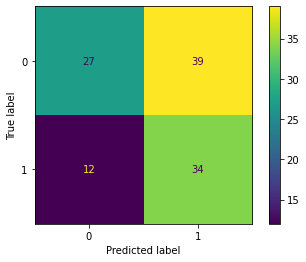

Precision: 0.466
Recall: 0.739
F1: 0.571
Accuracy: 0.545


In [23]:
X_train, X_test, y_train, y_test = generate_data(df3)
clf = rf(max_depth=5, max_features="log2")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

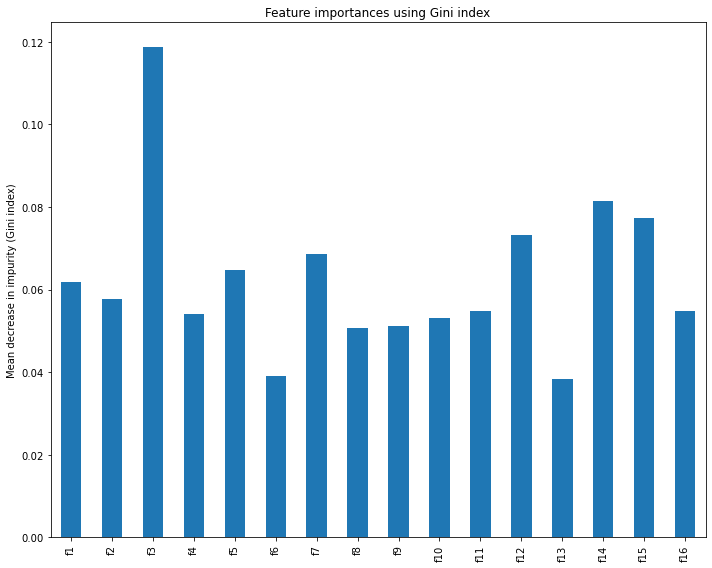

In [24]:
plot_gini_index(clf, X_train)

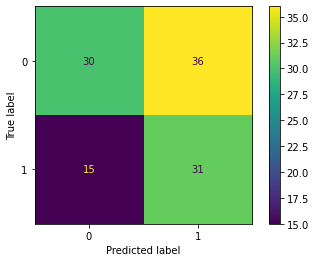

Precision: 0.463
Recall: 0.674
F1: 0.549
Accuracy: 0.545


In [25]:
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)
model_metrics(clf, y_test, y_pred)

# NMF

In [139]:
def coding(X, W, H0, 
          r=None, 
          a1=0, #L1 regularizer
          a2=0, #L2 regularizer
          sub_iter=[5], #1 
          stopping_grad_ratio=0.0001, 
          nonnegativity=True,
          subsample_ratio=1):
    """
    Find \hat{H} = argmin_H ( || X - WH||_{F}^2 + a1*|H| + a2*|H|_{F}^{2} ) within radius r from H0
    Use row-wise projected gradient descent
    """
    H1 = H0.copy()
    i = 0
    dist = 1
    idx = np.arange(X.shape[1])
    if subsample_ratio>1:  # subsample columns of X and solve reduced problem (like in SGD)
        idx = np.random.randint(X.shape[1], size=X.shape[1]//subsample_ratio)
    A = W.T @ W ## Needed for gradient computation
    grad = W.T @ (W @ H0 - X)
    while (i < np.random.choice(sub_iter)):
        step_size = (1 / (((i + 1) ** (1)) * (np.trace(A) + 1)))
        H1 -= step_size * grad 
        if nonnegativity:
            H1 = np.maximum(H1, 0)  # nonnegativity constraint
        i = i + 1
    return H1


def ALS(X,
        n_components = 10, # number of columns in the dictionary matrix W
        n_iter=100,
        a0 = 0, # L1 regularizer for H
        a1 = 0, # L1 regularizer for W
        a12 = 0, # L2 regularizer for W
        H_nonnegativity=True,
        W_nonnegativity=True,
        compute_recons_error=False,
        subsample_ratio = 10):
    
        '''
        Given data matrix X, use alternating least squares to find factors W,H so that 
                                || X - WH ||_{F}^2 + a0*|H|_{1} + a1*|W|_{1} + a12 * |W|_{F}^{2}
        is minimized (at least locally)
        '''
        
        d, n = X.shape
        r = n_components
        
        #normalization = np.linalg.norm(X.reshape(-1,1),1)/np.product(X.shape) # avg entry of X
        #print('!!! avg entry of X', normalization)
        #X = X/normalization

        # Initialize factors 
        W = np.random.rand(d,r)
        H = np.random.rand(r,n) 
        # H = H * np.linalg.norm(X) / np.linalg.norm(H)
        for i in trange(n_iter):
            #H = coding_within_radius(X, W.copy(), H.copy(), a1=a0, nonnegativity=H_nonnegativity, subsample_ratio=subsample_ratio)
            #W = coding_within_radius(X.T, H.copy().T, W.copy().T, a1=a1, a2=a12, nonnegativity=W_nonnegativity, subsample_ratio=subsample_ratio).T
            H = coding(X, W.copy(), H.copy(), a1=a0, nonnegativity=H_nonnegativity, subsample_ratio=subsample_ratio)
            W = coding(X.T, H.copy().T, W.copy().T, a1=a1, a2=a12, nonnegativity=W_nonnegativity, subsample_ratio=subsample_ratio).T
            W /= np.linalg.norm(W)
            if compute_recons_error and (i % 10 == 0) :
                print('iteration %i, reconstruction error %f' % (i, np.linalg.norm(X-W@H)**2))
        return W, H


def display_dictionary(W, save_name=None, score=None, grid_shape=None, figsize=[10,10]):
    k = int(np.sqrt(W.shape[0]))
    rows = int(np.sqrt(W.shape[1]))
    cols = int(np.sqrt(W.shape[1]))
    if grid_shape is not None:
        rows = grid_shape[0]
        cols = grid_shape[1]
    
    figsize0=figsize
    if (score is None) and (grid_shape is not None):
        figsize0=(cols, rows)
    if (score is not None) and (grid_shape is not None):
        figsize0=(cols, rows+0.2)
    
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=figsize0,
                            subplot_kw={'xticks': [], 'yticks': []})
        
        
    for ax, i in zip(axs.flat, range(100)):
        if score is not None:
            idx = np.argsort(score)
            idx = np.flip(idx)    
            
            ax.imshow(W.T[idx[i]].reshape(k, k), cmap="viridis", interpolation='nearest')
            ax.set_xlabel('%1.2f' % score[i], fontsize=13)  # get the largest first
            ax.xaxis.set_label_coords(0.5, -0.05)
        else: 
            ax.imshow(W.T[i].reshape(k, k), cmap="viridis", interpolation='nearest')
            if score is not None:
                ax.set_xlabel('%1.2f' % score[i], fontsize=13)  # get the largest first
                ax.xaxis.set_label_coords(0.5, -0.05)
       
    plt.tight_layout()
    # plt.suptitle('Dictionary learned from patches of size %d' % k, fontsize=16)
    plt.subplots_adjust(0.08, 0.02, 0.92, 0.85, 0.08, 0.23)
    
    if save_name is not None:
        plt.savefig( save_name, bbox_inches='tight')
    plt.show()
    
def display_graphs(title,
                     save_path,
                     grid_shape=[2,3],
                     fig_size=[10,10],
                     data = None, # [X, embs]
                     show_importance=False):

        # columns of X = vectorized k x k adjacency matrices
        # corresponding list in embs = sequence of nodes (may overalp)
        X, embs = data
        print('X.shape', X.shape)

        rows = grid_shape[0]
        cols = grid_shape[1]

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        # make outer gridspec

        idx = np.arange(X.shape[1])
        outer_grid = gridspec.GridSpec(nrows=rows, ncols=cols, wspace=0.02, hspace=0.02)

        # make nested gridspecs
        for i in range(rows * cols):
            a = i // cols
            b = i % rows

            Ndict_wspace = 0.05
            Ndict_hspace = 0.05

            # display graphs
            inner_grid = outer_grid[i].subgridspec(1, 1, wspace=Ndict_wspace, hspace=Ndict_hspace)

            # get rid of duplicate nodes
            A = X[:,idx[i]]
            A = X[:,idx[i]].reshape(int(np.sqrt(X.shape[0])), -1)
            H = nn.NNetwork()
            H.read_adj(A, embs[idx[i]])
            A_sub = H.get_adjacency_matrix()

            # read in as a nx graph for plotting
            G1 = nx.from_numpy_matrix(A_sub)
            ax = fig.add_subplot(inner_grid[0, 0])
            pos = nx.spring_layout(G1)
            edges = G1.edges()
            weights = [1*G1[u][v]['weight'] for u,v in edges]
            nx.draw(G1, with_labels=False, node_size=20, ax=ax, width=weights, label='Graph')

            ax.set_xticks([])
            ax.set_yticks([])

        plt.suptitle(title, fontsize=15)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        fig.savefig(save_path, bbox_inches='tight')
        
def display_dict_and_graph(title,
                           W, 
                           singular_values, 
                           save_path,
                           grid_shape=None,
                           fig_size=[10,10],
                           show_importance=False,
                           only_show_matrices=True):
        
        n_components = W.shape[1]
        k = int(np.sqrt(W.shape[0]))

        rows = np.round(np.sqrt(n_components))
        rows = rows.astype(int)
        if grid_shape is not None:
            rows = grid_shape[0]
            cols = grid_shape[1]
        else:
            if rows ** 2 == n_components:
                cols = rows
            else:
                cols = rows + 1

        if show_importance:
            # importance = np.sum(self.code, axis=1) / sum(sum(self.code))
            idx = np.argsort(singular_values)
            idx = np.flip(idx)
        else:
            idx = np.arange(W.shape[1])

        Ndict_wspace = 0.05
        Ndict_hspace = 0.05

        fig = plt.figure(figsize=fig_size, constrained_layout=False)
        ncols = 2 
        if only_show_matrices:
            ncols = 1
        outer_grid = gridspec.GridSpec(nrows=1, ncols=ncols, wspace=0.02, hspace=0.02)
        for t in np.arange(2):
            # make nested gridspecs

            if t == 0:
                ### Make gridspec
                inner_grid = outer_grid[t].subgridspec(rows, cols, wspace=Ndict_wspace, hspace=Ndict_hspace)
                #gs1 = fig.add_gridspec(nrows=rows, ncols=cols, wspace=0.05, hspace=0.05)

                for i in range(rows * cols):
                    a = i // cols
                    b = i % cols
                    ax = fig.add_subplot(inner_grid[a, b])
                    ax.imshow(W.T[idx[i]].reshape(k, k), cmap="viridis", interpolation='nearest')
                    # ax.set_xlabel('%1.2f' % importance[idx[i]], fontsize=13)  # get the largest first
                    # ax.xaxis.set_label_coords(0.5, -0.05)  # adjust location of importance appearing beneath patches
                    ax.set_xticks([])
                    ax.set_yticks([])
            if (t == 1) and not only_show_matrices:
                inner_grid = outer_grid[t].subgridspec(rows, cols, wspace=Ndict_wspace, hspace=Ndict_hspace)
                #gs1 = fig.add_gridspec(nrows=rows, ncols=cols, wspace=0.05, hspace=0.05)

                for i in range(rows * cols):
                    a = i // cols
                    b = i % cols

                    G1 = nx.from_numpy_matrix(W[:,idx[i]].reshape(int(np.sqrt(W.shape[0])),-1))
                    ax = fig.add_subplot(inner_grid[a, b])
                    pos = nx.spring_layout(G1)
                    edges = G1.edges()
                    weights = [2*G1[u][v]['weight'] for u,v in edges]
                    nx.draw(G1, with_labels=False, node_size=10, ax=ax, width=weights, label='Graph')
                    if show_importance:
                        ax.set_xlabel('%1.2f' % importance[idx[i]], fontsize=13)  # get the largest first
                        ax.xaxis.set_label_coords(0.5, -0.05)  # adjust location of importance appearing beneath patches

                    ax.set_xticks([])
                    ax.set_yticks([])

        if title is not None:
            plt.suptitle(title, fontsize=25)
        fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0)
        fig.savefig(save_path, bbox_inches='tight')

In [85]:
import numpy as np
from NNetwork import NNetwork as nn
import networkx as nx
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics, model_selection
from tqdm import trange
from sklearn.cluster import KMeans
import matplotlib.gridspec as gridspec
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [96]:
g2v_true = df3[df3['Concentrated'] == True].drop('Concentrated', axis = 1)
g2v_false = df3[df3['Concentrated'] == False].drop('Concentrated', axis = 1)

In [108]:
g2v_true = g2v_true.sample(n=1936)
g2v_false = g2v_false.sample(n=1936)

In [110]:
X_true = g2v_true.values
X_false = g2v_false.values

In [111]:
W_true, H_true = ALS(X=X_true, 
           n_components=9, # Reconstruction Error reduces as n_components increases
           n_iter=1000, 
           a0 = 0, # L1 regularizer for H
           a1 = 0, # L1 regularizer for W
           a12 = 0, # L2 regularizer for W
           H_nonnegativity=True,
           W_nonnegativity=True,
           compute_recons_error=True,
           subsample_ratio=1)

 11%|███▋                             | 112/1000 [00:00<00:01, 551.90it/s]

iteration 0, reconstruction error 2044.074073
iteration 10, reconstruction error 831.008673
iteration 20, reconstruction error 833.809319
iteration 30, reconstruction error 832.723439
iteration 40, reconstruction error 829.263240
iteration 50, reconstruction error 819.001758
iteration 60, reconstruction error 795.137120
iteration 70, reconstruction error 761.797391
iteration 80, reconstruction error 733.747061
iteration 90, reconstruction error 708.375646
iteration 100, reconstruction error 685.374345
iteration 110, reconstruction error 670.838258


 22%|███████▎                         | 222/1000 [00:00<00:01, 533.51it/s]

iteration 120, reconstruction error 664.470846
iteration 130, reconstruction error 661.737055
iteration 140, reconstruction error 660.155282
iteration 150, reconstruction error 659.112249
iteration 160, reconstruction error 658.317589
iteration 170, reconstruction error 657.617621
iteration 180, reconstruction error 657.021531
iteration 190, reconstruction error 656.592043
iteration 200, reconstruction error 656.265738
iteration 210, reconstruction error 656.021308
iteration 220, reconstruction error 655.839601


 35%|███████████▌                     | 351/1000 [00:00<00:01, 599.64it/s]

iteration 230, reconstruction error 655.702866
iteration 240, reconstruction error 655.592344
iteration 250, reconstruction error 655.498545
iteration 260, reconstruction error 655.416613
iteration 270, reconstruction error 655.342199
iteration 280, reconstruction error 655.272459
iteration 290, reconstruction error 655.205868
iteration 300, reconstruction error 655.141376
iteration 310, reconstruction error 655.077944
iteration 320, reconstruction error 655.014601
iteration 330, reconstruction error 654.952696
iteration 340, reconstruction error 654.890363
iteration 350, reconstruction error 654.826559
iteration 360, reconstruction error 654.762515


 49%|████████████████▏                | 490/1000 [00:00<00:00, 646.25it/s]

iteration 370, reconstruction error 654.696707
iteration 380, reconstruction error 654.629165
iteration 390, reconstruction error 654.559929
iteration 400, reconstruction error 654.489642
iteration 410, reconstruction error 654.419611
iteration 420, reconstruction error 654.351683
iteration 430, reconstruction error 654.287000
iteration 440, reconstruction error 654.225810
iteration 450, reconstruction error 654.168244
iteration 460, reconstruction error 654.114483
iteration 470, reconstruction error 654.064713
iteration 480, reconstruction error 654.018385
iteration 490, reconstruction error 653.975677
iteration 500, reconstruction error 653.936445


 62%|████████████████████▍            | 619/1000 [00:01<00:00, 602.49it/s]

iteration 510, reconstruction error 653.900788
iteration 520, reconstruction error 653.867621
iteration 530, reconstruction error 653.836440
iteration 540, reconstruction error 653.807061
iteration 550, reconstruction error 653.779142
iteration 560, reconstruction error 653.752518
iteration 570, reconstruction error 653.726999
iteration 580, reconstruction error 653.702464
iteration 590, reconstruction error 653.678788
iteration 600, reconstruction error 653.655780
iteration 610, reconstruction error 653.633314
iteration 620, reconstruction error 653.611374


 76%|████████████████████████▉        | 755/1000 [00:01<00:00, 640.34it/s]

iteration 630, reconstruction error 653.589867
iteration 640, reconstruction error 653.568776
iteration 650, reconstruction error 653.548014
iteration 660, reconstruction error 653.527515
iteration 670, reconstruction error 653.507188
iteration 680, reconstruction error 653.486998
iteration 690, reconstruction error 653.466940
iteration 700, reconstruction error 653.446992
iteration 710, reconstruction error 653.427133
iteration 720, reconstruction error 653.409070
iteration 730, reconstruction error 653.391892
iteration 740, reconstruction error 653.375024
iteration 750, reconstruction error 653.358409
iteration 760, reconstruction error 653.342016


 89%|█████████████████████████████▎   | 888/1000 [00:01<00:00, 635.51it/s]

iteration 770, reconstruction error 653.325828
iteration 780, reconstruction error 653.309844
iteration 790, reconstruction error 653.294056
iteration 800, reconstruction error 653.278462
iteration 810, reconstruction error 653.264437
iteration 820, reconstruction error 653.251256
iteration 830, reconstruction error 653.238387
iteration 840, reconstruction error 653.225736
iteration 850, reconstruction error 653.213251
iteration 860, reconstruction error 653.200982
iteration 870, reconstruction error 653.189101
iteration 880, reconstruction error 653.177365
iteration 890, reconstruction error 653.165746


100%|████████████████████████████████| 1000/1000 [00:01<00:00, 619.40it/s]

iteration 900, reconstruction error 653.154216
iteration 910, reconstruction error 653.142765
iteration 920, reconstruction error 653.131389
iteration 930, reconstruction error 653.120092
iteration 940, reconstruction error 653.108879
iteration 950, reconstruction error 653.097754
iteration 960, reconstruction error 653.086726
iteration 970, reconstruction error 653.075911
iteration 980, reconstruction error 653.065353
iteration 990, reconstruction error 653.054932


In [112]:
W_false, H_false = ALS(X=X_false, 
           n_components=9, # Reconstruction Error reduces as n_components increases
           n_iter=1000, 
           a0 = 0, # L1 regularizer for H
           a1 = 0, # L1 regularizer for W
           a12 = 0, # L2 regularizer for W
           H_nonnegativity=True,
           W_nonnegativity=True,
           compute_recons_error=True,
           subsample_ratio=1)

 11%|███▊                             | 114/1000 [00:00<00:01, 571.80it/s]

iteration 0, reconstruction error 2024.304970
iteration 10, reconstruction error 1000.311937
iteration 20, reconstruction error 1001.698256
iteration 30, reconstruction error 997.910201
iteration 40, reconstruction error 988.426520
iteration 50, reconstruction error 968.481039
iteration 60, reconstruction error 940.120242
iteration 70, reconstruction error 915.544389
iteration 80, reconstruction error 892.273741
iteration 90, reconstruction error 872.786341
iteration 100, reconstruction error 860.891437
iteration 110, reconstruction error 856.402195


 24%|███████▉                         | 242/1000 [00:00<00:01, 606.84it/s]

iteration 120, reconstruction error 854.477814
iteration 130, reconstruction error 853.221688
iteration 140, reconstruction error 852.201383
iteration 150, reconstruction error 851.544967
iteration 160, reconstruction error 851.230443
iteration 170, reconstruction error 851.075975
iteration 180, reconstruction error 850.977948
iteration 190, reconstruction error 850.901156
iteration 200, reconstruction error 850.835682
iteration 210, reconstruction error 850.776956
iteration 220, reconstruction error 850.724195
iteration 230, reconstruction error 850.680373
iteration 240, reconstruction error 850.651232


 36%|███████████▉                     | 362/1000 [00:00<00:01, 559.43it/s]

iteration 250, reconstruction error 850.626635
iteration 260, reconstruction error 850.605335
iteration 270, reconstruction error 850.586489
iteration 280, reconstruction error 850.569745
iteration 290, reconstruction error 850.554658
iteration 300, reconstruction error 850.540933
iteration 310, reconstruction error 850.528426
iteration 320, reconstruction error 850.517074
iteration 330, reconstruction error 850.506568
iteration 340, reconstruction error 850.496764
iteration 350, reconstruction error 850.487564
iteration 360, reconstruction error 850.478876


 49%|████████████████▎                | 493/1000 [00:00<00:00, 610.07it/s]

iteration 370, reconstruction error 850.470619
iteration 380, reconstruction error 850.462694
iteration 390, reconstruction error 850.455023
iteration 400, reconstruction error 850.447538
iteration 410, reconstruction error 850.440180
iteration 420, reconstruction error 850.432877
iteration 430, reconstruction error 850.425573
iteration 440, reconstruction error 850.418282
iteration 450, reconstruction error 850.410825
iteration 460, reconstruction error 850.403106
iteration 470, reconstruction error 850.395019
iteration 480, reconstruction error 850.386455
iteration 490, reconstruction error 850.377281


 62%|████████████████████▎            | 617/1000 [00:01<00:00, 603.68it/s]

iteration 500, reconstruction error 850.367336
iteration 510, reconstruction error 850.356483
iteration 520, reconstruction error 850.344541
iteration 530, reconstruction error 850.331256
iteration 540, reconstruction error 850.316259
iteration 550, reconstruction error 850.299711
iteration 560, reconstruction error 850.280933
iteration 570, reconstruction error 850.259056
iteration 580, reconstruction error 850.233436
iteration 590, reconstruction error 850.203399
iteration 600, reconstruction error 850.168111
iteration 610, reconstruction error 850.126753
iteration 620, reconstruction error 850.078353
iteration 630, reconstruction error 850.022781


 74%|████████████████████████▎        | 738/1000 [00:01<00:00, 572.00it/s]

iteration 640, reconstruction error 849.959811
iteration 650, reconstruction error 849.889795
iteration 660, reconstruction error 849.814400
iteration 670, reconstruction error 849.736148
iteration 680, reconstruction error 849.656744
iteration 690, reconstruction error 849.578655
iteration 700, reconstruction error 849.503962
iteration 710, reconstruction error 849.434143
iteration 720, reconstruction error 849.370013
iteration 730, reconstruction error 849.312543
iteration 740, reconstruction error 849.263295
iteration 750, reconstruction error 849.220707


 85%|████████████████████████████▏    | 854/1000 [00:01<00:00, 570.74it/s]

iteration 760, reconstruction error 849.182938
iteration 770, reconstruction error 849.149645
iteration 780, reconstruction error 849.120088
iteration 790, reconstruction error 849.094046
iteration 800, reconstruction error 849.070929
iteration 810, reconstruction error 849.050388
iteration 820, reconstruction error 849.032058
iteration 830, reconstruction error 849.015611
iteration 840, reconstruction error 849.000808
iteration 850, reconstruction error 848.987321
iteration 860, reconstruction error 848.974917
iteration 870, reconstruction error 848.963467


 98%|████████████████████████████████▏| 977/1000 [00:01<00:00, 586.28it/s]

iteration 880, reconstruction error 848.952865
iteration 890, reconstruction error 848.943100
iteration 900, reconstruction error 848.934029
iteration 910, reconstruction error 848.925544
iteration 920, reconstruction error 848.917587
iteration 930, reconstruction error 848.910061
iteration 940, reconstruction error 848.902905
iteration 950, reconstruction error 848.896079
iteration 960, reconstruction error 848.889540
iteration 970, reconstruction error 848.883260
iteration 980, reconstruction error 848.877222
iteration 990, reconstruction error 848.871404


100%|████████████████████████████████| 1000/1000 [00:01<00:00, 576.01it/s]


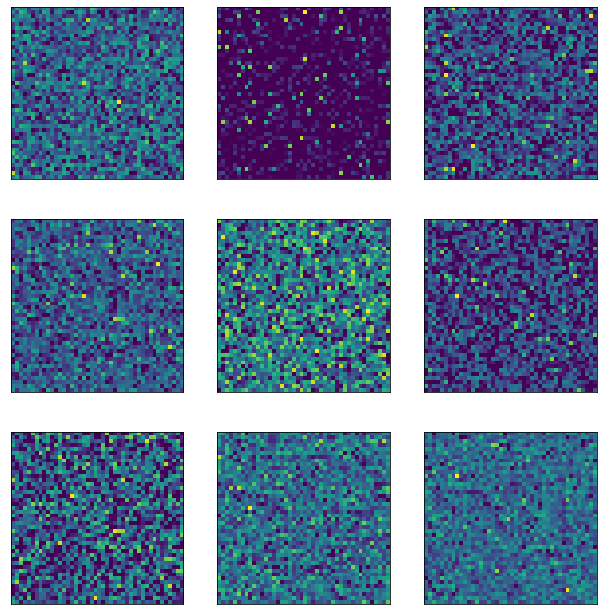

In [117]:
display_dictionary(W_true, figsize=[10,10])

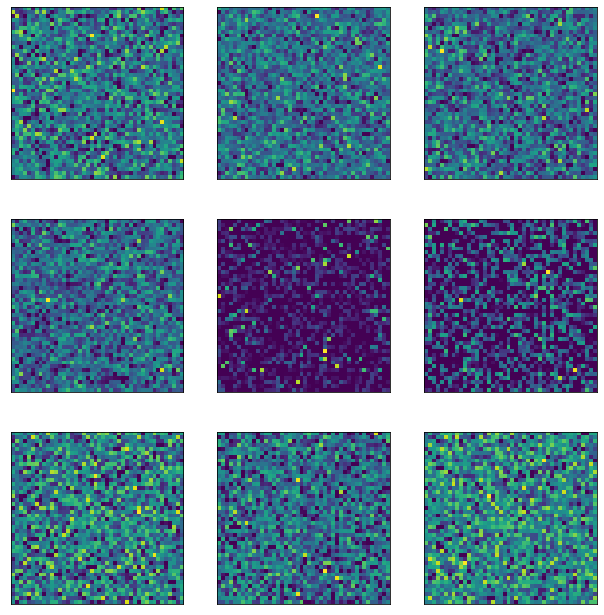

In [118]:
display_dictionary(W_false, figsize=[10,10])

# Try to generate very large NWS graph:

In [120]:
G = nx.newman_watts_strogatz_graph(5000, 25, 0.85)

In [119]:
?nx.newman_watts_strogatz_graph

In [125]:
edge_list = list(G.edges())

In [126]:
G = nn.NNetwork()
G.add_edges(edge_list)

In [128]:
print('num nodes in G', len(G.nodes()))
print('num edges in G', len(G.get_edges()))

num nodes in G 5000
num edges in G 222160


num of subgraphs induced on k-paths: 10000
X.shape (1764, 10000)


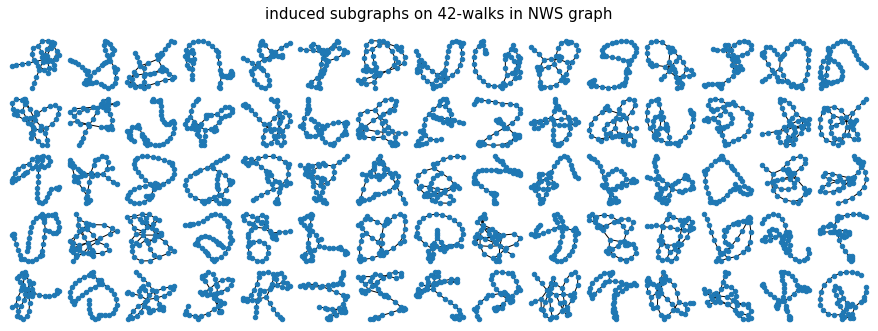

In [134]:
k=42

X, embs = G.get_patches(k=k, sample_size=10000, skip_folded_hom=True)

display_graphs(title='induced subgraphs on {}-walks in NWS graph'.format(k),
                 save_path="images/", 
                 data = [X, embs],
                 grid_shape = [5, 15],
                 fig_size = [15, 5],
                 show_importance=False)

In [140]:
W, H = ALS(X=X, 
           n_components=16, # Reconstruction Error reduces as n_components increases
           n_iter=100, 
           a0 = 0, # L1 regularizer for H
           a1 = 0, # L1 regularizer for W
           a12 = 0, # L2 regularizer for W
           H_nonnegativity=True,
           W_nonnegativity=True,
           compute_recons_error=True,
           subsample_ratio=1)

  1%|▎                                    | 1/100 [00:00<00:39,  2.53it/s]

iteration 0, reconstruction error 1156929.796584


 12%|████▎                               | 12/100 [00:02<00:20,  4.25it/s]

iteration 10, reconstruction error 337549.373182


 21%|███████▌                            | 21/100 [00:05<00:20,  3.91it/s]

iteration 20, reconstruction error 337512.745925


 31%|███████████▏                        | 31/100 [00:07<00:17,  3.91it/s]

iteration 30, reconstruction error 337421.563889


 42%|███████████████                     | 42/100 [00:10<00:15,  3.77it/s]

iteration 40, reconstruction error 337161.754237


 52%|██████████████████▋                 | 52/100 [00:12<00:11,  4.22it/s]

iteration 50, reconstruction error 336442.341637


 61%|█████████████████████▉              | 61/100 [00:14<00:09,  4.17it/s]

iteration 60, reconstruction error 334761.961064


 71%|█████████████████████████▌          | 71/100 [00:16<00:07,  4.03it/s]

iteration 70, reconstruction error 331674.774863


 81%|█████████████████████████████▏      | 81/100 [00:19<00:04,  3.82it/s]

iteration 80, reconstruction error 327082.265785


 91%|████████████████████████████████▊   | 91/100 [00:21<00:02,  3.83it/s]

iteration 90, reconstruction error 321352.128122


100%|███████████████████████████████████| 100/100 [00:23<00:00,  4.22it/s]


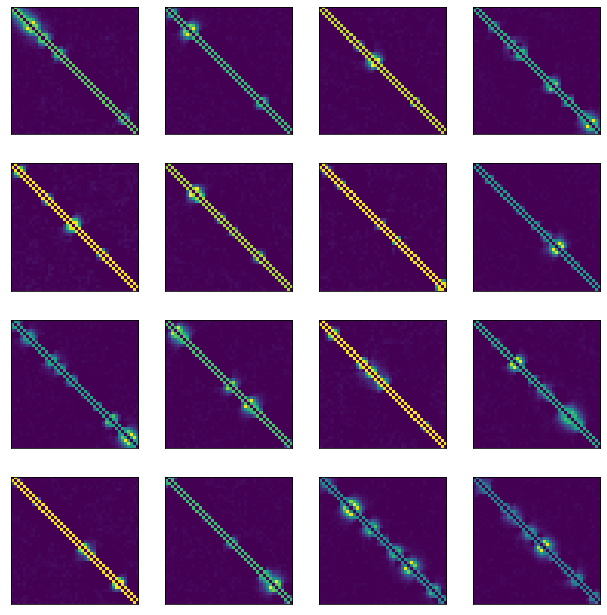

In [141]:
display_dictionary(W, figsize=[10,10])

In [34]:
l = [1.1, 1.4, 1.53, 0.67]
v1 = np.array(l)
v1

array([1.1 , 1.4 , 1.53, 0.67])

In [35]:
np.repeat(2*np.pi, len(v1)) - v1

array([5.18318531, 4.88318531, 4.75318531, 5.61318531])

In [36]:
np.repeat(2*np.pi, len(v1))

array([6.28318531, 6.28318531, 6.28318531, 6.28318531])